>In this project, i am working for a client who wants to create a model that can predict the price of apartments in the city of Buenos Aires — with a focus on apartments that cost less than $400,000

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings("ignore")

Writing a function named `wrangle` that takes a file path as an argument and returns a DataFrame.

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    mask_place = df["place_with_parent_names"].str.contains("Capital Federal")
    
    mask_apt = df["property_type"] == "apartment"
    
    mask_price = df["price_aprox_usd"] < 400_000
    
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    
    df = df[mask_place & mask_apt & mask_price & mask_area]
    
    df.drop(columns=["lat-lon"], inplace=True)
    
    return df

Now that i have a function written, let's test it out on one of the CSV files we'll use in this project. 

In [3]:
df = wrangle("properati-AR-2016-11-01-properties-2.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14114 entries, 1 to 145742
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  14114 non-null  object 
 1   operation                   14114 non-null  object 
 2   property_type               14114 non-null  object 
 3   place_name                  14114 non-null  object 
 4   place_with_parent_names     14114 non-null  object 
 5   geonames_id                 13633 non-null  float64
 6   lat                         13562 non-null  float64
 7   lon                         13562 non-null  float64
 8   price                       14114 non-null  float64
 9   currency                    14114 non-null  object 
 10  price_aprox_local_currency  14114 non-null  float64
 11  price_aprox_usd             14114 non-null  float64
 12  surface_total_in_m2         10015 non-null  float64
 13  surface_covered_in_m2       14

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
1,2012-10-10,sell,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,3427458.0,-34.603684,-58.381559,83000.0,USD,...,40.0,2075.000000,2075.000000,1.0,2.0,300.0,http://villa-crespo.properati.com.ar/13tz_vent...,"2 AMBIENTES, VENTA, VILLA CRESPO1ER PISO POR E...",DEPARTAMENTO EN VENTA,https://thumbs-cf.properati.com/8/ujkSk81S7fhu...
195,2013-05-20,sell,apartment,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,3427451.0,-34.598942,-58.500647,324720.0,USD,...,140.0,NaN,2319.428571,8.0,4.0,NaN,http://villa-devoto.properati.com.ar/73iz_vent...,Corredor Responsable: Patricia Maria Sodor - C...,ULTIMA UNIDAD DE 4 AMBIENTES!,https://thumbs-cf.properati.com/0/G63ECCkemzvp...
197,2013-05-20,sell,apartment,Chacarita,|Argentina|Capital Federal|Chacarita|,3435506.0,-34.585106,-58.462549,80000.0,USD,...,55.0,NaN,1454.545455,9.0,2.0,NaN,http://chacarita.properati.com.ar/79qp_venta_d...,Corredor Responsable: Jorge Salafia - CUCICBA ...,DIVINO MONOAMB EN TRIUNVIRATO PESOSSS!!!! FINA...,https://thumbs-cf.properati.com/3/eRJkRtFUzcGu...
199,2013-05-20,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,3430234.0,-34.600627,-58.392334,150000.0,USD,...,36.0,NaN,4166.666667,NaN,2.0,NaN,http://palermo.properati.com.ar/79ty_venta_dep...,Corredor Responsable: Jorge Salafia - CUCICBA ...,Dos ambientes y cochera - CON RENTA,https://thumbs-cf.properati.com/6/usFZh3CUU5RA...
306,2013-05-24,sell,apartment,Barracas,|Argentina|Capital Federal|Barracas|,3436134.0,-34.634679,-58.371091,80000.0,USD,...,60.0,1333.333333,1333.333333,NaN,2.0,NaN,http://barracas.properati.com.ar/7fmr_venta_de...,"Departamento en torre con living comedor,cocin...",Departamento,https://thumbs-cf.properati.com/7/rVJm13qMQ0eV...


For this project, i want to build a model for apartments in Buenos Aires proper ("Capital Federal") that cost less than $400,000. Looking at the first five rows of our DataFrame, we can already see that there properties that fall outside those parameters. So our first cleaning task is to remove those observations from our dataset. Since we're using a function to import and clean our data, we'll need to make changes there.

Add to your `wrangle` function so that the DataFrame it returns only includes apartments in Buenos Aires (`"Capital Federal"`) that cost less than $400,000 USD. Then recreate `df` from `data/buenos-aires-real-estate-1.csv` by re-running the cells above. 

In [33]:
mask_place = df["place_with_parent_names"].str.contains("Capital Federal")
df[mask_place].head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
1,2012-10-10,sell,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,3427458.0,-34.603684,-58.381559,83000.0,USD,...,40.0,2075.000000,2075.000000,1.0,2.0,300.0,http://villa-crespo.properati.com.ar/13tz_vent...,"2 AMBIENTES, VENTA, VILLA CRESPO1ER PISO POR E...",DEPARTAMENTO EN VENTA,https://thumbs-cf.properati.com/8/ujkSk81S7fhu...
197,2013-05-20,sell,apartment,Chacarita,|Argentina|Capital Federal|Chacarita|,3435506.0,-34.585106,-58.462549,80000.0,USD,...,55.0,NaN,1454.545455,9.0,2.0,NaN,http://chacarita.properati.com.ar/79qp_venta_d...,Corredor Responsable: Jorge Salafia - CUCICBA ...,DIVINO MONOAMB EN TRIUNVIRATO PESOSSS!!!! FINA...,https://thumbs-cf.properati.com/3/eRJkRtFUzcGu...
306,2013-05-24,sell,apartment,Barracas,|Argentina|Capital Federal|Barracas|,3436134.0,-34.634679,-58.371091,80000.0,USD,...,60.0,1333.333333,1333.333333,NaN,2.0,NaN,http://barracas.properati.com.ar/7fmr_venta_de...,"Departamento en torre con living comedor,cocin...",Departamento,https://thumbs-cf.properati.com/7/rVJm13qMQ0eV...
337,2013-05-24,sell,apartment,Congreso,|Argentina|Capital Federal|Congreso|,3435259.0,-34.610182,-58.394737,138000.0,USD,...,79.0,1642.857143,1746.835443,NaN,3.0,NaN,http://congreso.properati.com.ar/7fq1_venta_de...,"EXCELENTE 3 AMBIENTES AL FRENTE, CON BALCN. IM...",EDIFICIO DE EPOCA EN IMPECABLE ESTADO SUPER AM...,https://thumbs-cf.properati.com/9/Pe2lcGiFDQ97...
467,2013-06-03,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,3430348.0,-34.543840,-58.480901,96000.0,USD,...,50.0,NaN,1920.000000,2.0,2.0,NaN,http://nunez.properati.com.ar/7kvu_venta_depar...,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,1 AMB DIVIS. AMPLIO BALCÓN CON PARRILLA A ESTR...,https://thumbs-cf.properati.com/8/Jts8eVq0TeB_...


In [34]:
df["property_type"].unique()

array(['apartment'], dtype=object)

In [35]:
mask_apt = df["property_type"] == "apartment"
df[mask_apt]

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
1,2012-10-10,sell,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,3427458.0,-34.603684,-58.381559,83000.0,USD,...,40.0,2075.000000,2075.000000,1.0,2.0,300.0,http://villa-crespo.properati.com.ar/13tz_vent...,"2 AMBIENTES, VENTA, VILLA CRESPO1ER PISO POR E...",DEPARTAMENTO EN VENTA,https://thumbs-cf.properati.com/8/ujkSk81S7fhu...
197,2013-05-20,sell,apartment,Chacarita,|Argentina|Capital Federal|Chacarita|,3435506.0,-34.585106,-58.462549,80000.0,USD,...,55.0,NaN,1454.545455,9.0,2.0,NaN,http://chacarita.properati.com.ar/79qp_venta_d...,Corredor Responsable: Jorge Salafia - CUCICBA ...,DIVINO MONOAMB EN TRIUNVIRATO PESOSSS!!!! FINA...,https://thumbs-cf.properati.com/3/eRJkRtFUzcGu...
306,2013-05-24,sell,apartment,Barracas,|Argentina|Capital Federal|Barracas|,3436134.0,-34.634679,-58.371091,80000.0,USD,...,60.0,1333.333333,1333.333333,NaN,2.0,NaN,http://barracas.properati.com.ar/7fmr_venta_de...,"Departamento en torre con living comedor,cocin...",Departamento,https://thumbs-cf.properati.com/7/rVJm13qMQ0eV...
337,2013-05-24,sell,apartment,Congreso,|Argentina|Capital Federal|Congreso|,3435259.0,-34.610182,-58.394737,138000.0,USD,...,79.0,1642.857143,1746.835443,NaN,3.0,NaN,http://congreso.properati.com.ar/7fq1_venta_de...,"EXCELENTE 3 AMBIENTES AL FRENTE, CON BALCN. IM...",EDIFICIO DE EPOCA EN IMPECABLE ESTADO SUPER AM...,https://thumbs-cf.properati.com/9/Pe2lcGiFDQ97...
467,2013-06-03,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,3430348.0,-34.543840,-58.480901,96000.0,USD,...,50.0,NaN,1920.000000,2.0,2.0,NaN,http://nunez.properati.com.ar/7kvu_venta_depar...,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,1 AMB DIVIS. AMPLIO BALCÓN CON PARRILLA A ESTR...,https://thumbs-cf.properati.com/8/Jts8eVq0TeB_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145673,2016-10-31,sell,apartment,Villa General Mitre,|Argentina|Capital Federal|Villa General Mitre|,3427433.0,-34.604786,-58.461832,125000.0,USD,...,44.0,2717.391304,2840.909091,NaN,2.0,2000.0,http://villa-general-mitre.properati.com.ar/12...,VENTA DOS AMBIENTES PISO ALTO CON COCHERA EN V...,MARGARIÑO CERVANTES 1400,https://thumbs-cf.properati.com/2/KjlFYQ5zE_r0...
145674,2016-10-31,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,3436109.0,-34.598679,-58.396335,190000.0,USD,...,93.0,2043.010753,2043.010753,NaN,4.0,3335.0,http://barrio-norte.properati.com.ar/12wh2_ven...,"Living comedor, tres dormitorios, dos baños, t...",Paraguay al 2000,https://thumbs-cf.properati.com/1/0jwFp4Aosqb-...
145675,2016-10-31,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,3430234.0,-34.577988,-58.423869,250000.0,USD,...,49.0,4807.692308,5102.040816,NaN,2.0,NaN,http://palermo.properati.com.ar/12wh3_venta_de...,VENTA EXCELENTE DEPARTAMENTO A ESTRENAR CON CO...,VENTA DEPARTAMENTO A ESTRENAR COCHERA PISO ALT...,https://thumbs-cf.properati.com/6/4CSF-wZ5WCVV...
145691,2016-10-31,sell,apartment,Floresta,|Argentina|Capital Federal|Floresta|,3433910.0,-34.622406,-58.477773,85000.0,USD,...,45.0,1634.615385,1888.888889,NaN,2.0,1200.0,http://floresta.properati.com.ar/12wi0_venta_d...,Excelente departamento de 2 ambientes al frent...,Excelente 2 amb. al frente,https://thumbs-cf.properati.com/7/4Mwa0cAXzsaI...


In [36]:
mask_price = df["price_aprox_usd"] < 400_000
mask_price

1         True
197       True
306       True
337       True
467       True
          ... 
145673    True
145674    True
145675    True
145691    True
145742    True
Name: price_aprox_usd, Length: 11368, dtype: bool

Create a histogram of `"surface_covered_in_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Apartment Sizes"`.

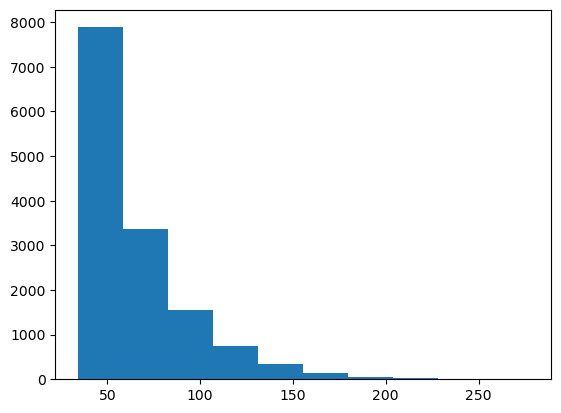

In [4]:
plt.hist(df["surface_covered_in_m2"]);

In [42]:
low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
mask_area = df["surface_covered_in_m2"].between(low, high)

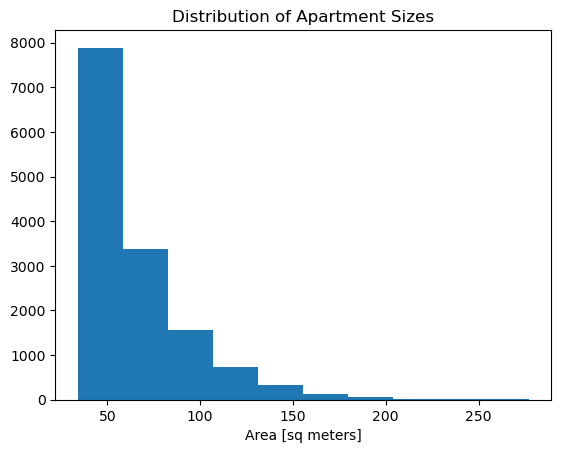

In [43]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

Calculate the summary statistics for `df`

In [19]:
df["surface_covered_in_m2"].describe()

count    14114.000000
mean        63.882103
std         30.096597
min         34.000000
25%         42.000000
50%         54.000000
75%         76.000000
max        277.000000
Name: surface_covered_in_m2, dtype: float64

The statistics above confirm what we suspected. While most of the apartments in our dataset are smaller that 76 square meters, there are some that are several thousand square meters. The best thing to do is to change our `wrangle` function and remove them from the dataset. 

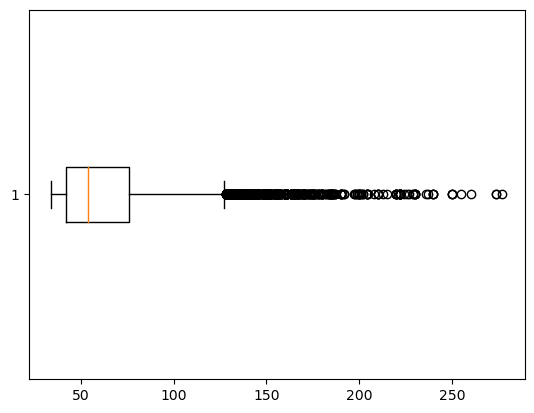

In [6]:
plt.boxplot(df["surface_covered_in_m2"], vert=False);

### Split

A key part in any model-building project is separating your **target** (the thing you want to predict) from your **features** (the information your model will use to make its predictions). Since this is our first model, we'll use just one feature: apartment size.

Create the feature matrix named `X_train`, which you'll use to train your model. It should contain one feature only: `["surface_covered_in_m2"]`. Remember that your feature matrix should always be two-dimensional. 

In [4]:
feature = ["surface_covered_in_m2"]
target =  "price_aprox_usd"
X = df[feature]
y = df[target]

### Baseline

The first step in building a model is baselining. To do this, One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be. 

In [5]:
y_mean = y.mean()
y_pred_baseline = [y_mean] * len(y)
mae_baseline = mean_absolute_error(y, y_pred_baseline)
print("mean apt price:", y_mean)
print("baseline mae:", mae_baseline)

mean apt price: 154234.66344480662
baseline mae: 59231.71223693788


Add a line to the plot below that shows the relationship between the observations `X_train` and our dumb model's predictions `y_pred_baseline`. Be sure that the line color is orange, and that it has the label `"Baseline Model"`.

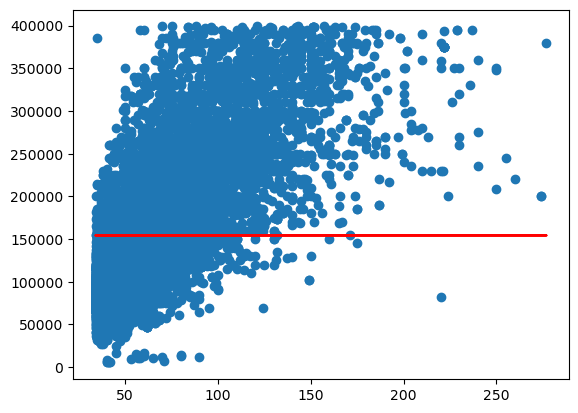

In [6]:
plt.plot(X, y_pred_baseline, color="r")
plt.scatter(X, y);

### Iterate

The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. Even though the model i am building is linear, the iteration process rarely follows a straight line. Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model. 

The first thing i need to do is create my model — in this case, one that uses linear regression.

In [7]:
model = LinearRegression().fit(X, y)
model

LinearRegression()

### Evaluate

The final step is to evaluate our model. In order to do that, we'll start by seeing how well it performs when making predictions for data that it saw during training. So let's have it predict the price for the houses in our training set.

In [8]:
y_pred_train = model.predict(X)
y_pred_train

array([108965.23867849, 298519.00201446, 137398.30317888, ...,
       118442.92684529, 239757.33538031, 122234.00211201])

In [9]:
mae_train = mean_absolute_error(y, y_pred_train)
mae_train

36489.057753264286

### Communicate Result

Extract the intercept from your model, and assign it to the variable intercept.

Extract the coefficient associated "surface_covered_in_m2" in your model, and assign it to the variable coefficient.

In [10]:
intercept = model.intercept_
coefficient = model.coef_[0]
print("intercept:", intercept.round(2))
print("coefficient:", coefficient.round(2))

intercept: 33143.73
coefficient: 1895.54


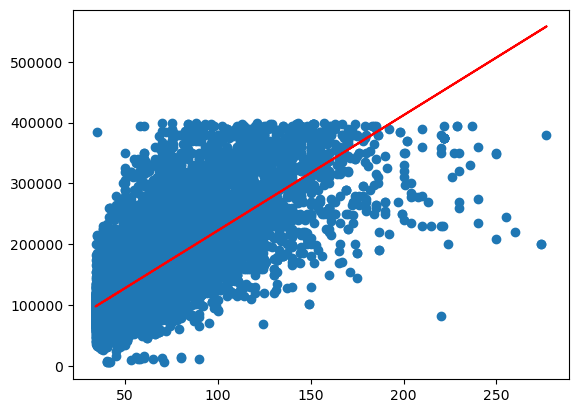

In [11]:
plt.plot(X, y_pred_train, color="r")
plt.scatter(X, y);